In [8]:
import numpy as np
import cv2

def calculate_cluster_centers(data, membership, fuzziness):
    num_clusters = membership.shape[1]
    num_samples = data.shape[0]
    num_features = data.shape[1]
    
    cluster_centers = np.zeros((num_clusters, num_features))
    
    for j in range(num_clusters):
        membership_exp = np.power(membership[:, j], fuzziness)
        sum_membership_exp = np.sum(membership_exp)
        cluster_centers[j, :] = np.sum(np.multiply(data, membership_exp.reshape(-1, 1)), axis=0) / sum_membership_exp
    
    return cluster_centers

def update_membership(data, cluster_centers, fuzziness):
    num_clusters = cluster_centers.shape[0]
    num_samples = data.shape[0]
    num_features = data.shape[1]
    
    membership = np.zeros((num_samples, num_clusters))
    
    for i in range(num_samples):
        for j in range(num_clusters):
            numerator = np.linalg.norm(data[i, :] - cluster_centers[j, :])
            denominator_sum = np.sum([np.linalg.norm(data[i, :] - cluster_centers[k, :]) for k in range(num_clusters)])
            membership[i, j] = 1 / np.power(numerator / denominator_sum, 2 / (fuzziness - 1))
    
    return membership

def fuzzy_cmeans_clustering(image, n_clusters, fuzziness=2, max_iters=100):
    # Reshape the image to a 2D array
    rows, cols, _ = image.shape
    data = image.reshape(-1, 3).astype(float)
    
    # Normalize the data
    data /= 255.0
    
    # Initialize cluster centers randomly
    cluster_centers = np.random.rand(n_clusters, data.shape[1])
    
    # Initialize membership matrix
    membership = np.zeros((data.shape[0], n_clusters))
    
    for _ in range(max_iters):
        # Update membership matrix
        membership = update_membership(data, cluster_centers, fuzziness)
        
        # Update cluster centers
        cluster_centers = calculate_cluster_centers(data, membership, fuzziness)
    
    # Assign pixels to the cluster with the highest membership value
    labels = np.argmax(membership, axis=1)
    
    # Reshape the labels to match the original image shape
    segmented_image = labels.reshape(rows, cols)
    
    return segmented_image

# Read the image
image = cv2.imread('bitmap.png')

# Convert the image to RGB format
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Set the number of clusters
n_clusters = 3

# Apply Fuzzy C-means clustering on the image
segmented_image = fuzzy_cmeans_clustering(image, n_clusters)

# Display the segmented image
# cv2.imshow('Segmented Image', segmented_image.astype(np.uint8))
# cv2.waitKey(0)
# cv2.destroyAllWindows()


C:\Users\marvi\AppData\Local\Temp\ipykernel_6744\3110060952.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  membership[i, j] = 1 / np.power(numerator / denominator_sum, 2 / (fuzziness - 1))
C:\Users\marvi\AppData\Local\Temp\ipykernel_6744\3110060952.py:14: RuntimeWarning: invalid value encountered in multiply
  cluster_centers[j, :] = np.sum(np.multiply(data, membership_exp.reshape(-1, 1)), axis=0) / sum_membership_exp
C:\Users\marvi\AppData\Local\Temp\ipykernel_6744\3110060952.py:14: RuntimeWarning: invalid value encountered in divide
  cluster_centers[j, :] = np.sum(np.multiply(data, membership_exp.reshape(-1, 1)), axis=0) / sum_membership_exp


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz

##### 1 #####
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'orange']

# Define three cluster centers
centers = [[4, 1],
           [5, 3],
           [7, 9]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[1, 3],
          [2, 1],
          [1.5, 1]]

# Generate test data
# np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
number_of_point = 100
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(number_of_point) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(number_of_point) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(number_of_point) * i))

# print(xpts)
# print(ypts)
# print(labels)

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title(f'Test data: {number_of_point} points x3 clusters.')

##### 2 #####
# Set up the loop and plot

fig1, axes1 = plt.subplots(2, 3, figsize=(10, 6))
alldata = np.vstack((xpts, ypts))
fpcs = []

# print(axes1)
print(fig1)

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=1, maxiter=10, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()
# print(fpc)
print(fpcs)

##### 3 #####
# fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
# alldata = np.vstack((xpts, ypts))
# fpcs = []
# # Regenerate fuzzy model with 3 cluster centers - note that center ordering
# # is random in this clustering algorithm, so the centers may change places
# cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
#     alldata, 3, 2, error=0.005, maxiter=1000)

# # Show 3-cluster model
# fig2, ax2 = plt.subplots()
# ax2.set_title('Trained model')
# for j in range(3):
#     ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
#              alldata[1, u_orig.argmax(axis=0) == j], 'o',
#              label='series ' + str(j))
# ax2.legend()

# # Generate uniformly sampled data spread across the range [0, 10] in x and y
# newdata = np.random.uniform(0, 1, (1100, 2)) * 10

# # Predict new cluster membership with `cmeans_predict` as well as
# # `cntr` from the 3-cluster model
# u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
#     newdata.T, cntr, 2, error=0.005, maxiter=1000)

# # Plot the classified uniform data. Note for visualization the maximum
# # membership value has been taken at each point (i.e. these are hardened,
# # not fuzzy results visualized) but the full fuzzy result is the output
# # from cmeans_predict.
# cluster_membership = np.argmax(u, axis=0)  # Hardening for visualization

# fig3, ax3 = plt.subplots()
# ax3.set_title('Random points classified according to known centers')
# for j in range(3):
#     ax3.plot(newdata[cluster_membership == j, 0],
#              newdata[cluster_membership == j, 1], 'o',
#              label='series ' + str(j))
# ax3.legend()

# plt.show()


0.5119399957278188
0.3374967955150639
0.26194680591659486
0.21332643020850695
0.17091006747126525
0.1526124210067004


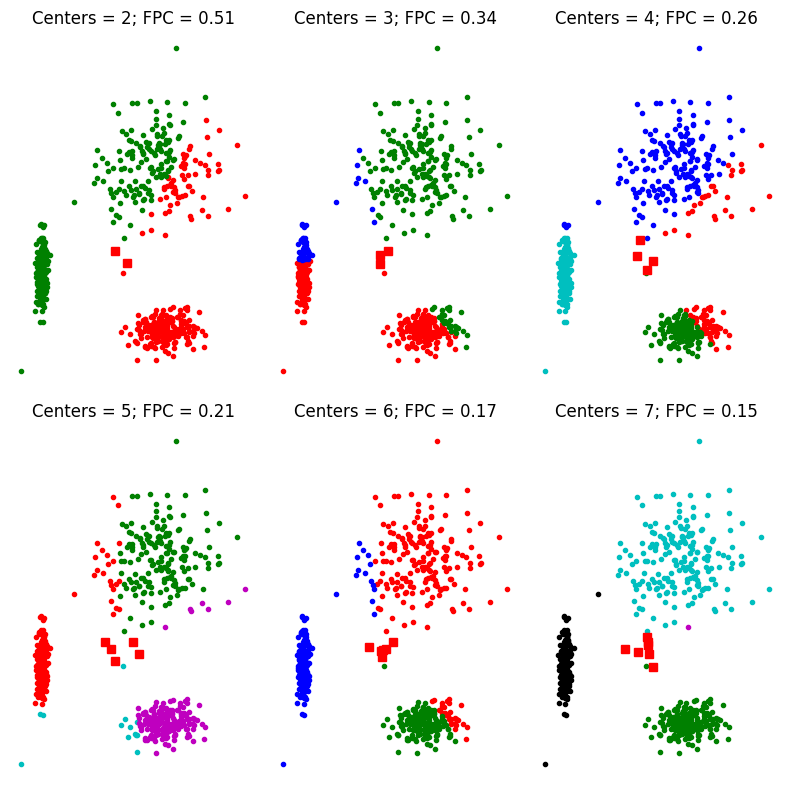

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = array = np.random.uniform(1, 10, size=(3, 2))
# Define three cluster sigmas in x and y, respectively
sigmas = array = np.random.uniform(0.1, 3, size=(3, 2))

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
# fig0, ax0 = plt.subplots()
# for label in range(3):
#     ax0.plot(xpts[labels == label], ypts[labels == label], '.',
#              color=colors[label])
# ax0.set_title('Test data: 200 points x3 clusters.')

# Set up the loop and plot
fig1, axes1 = plt.subplots(2, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []
# print(alldata)

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=4, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')
    # print(cntr)
    # print(u)
    # print(u0)
    # print(d)
    # print(jm)
    # print(p)
    print(fpc)

fig1.tight_layout()

[ 0.          3.51326299  4.77041457  1.51752083  1.27607146  0.90120484
  4.68286374  1.35610129  1.53059145  5.00972427  2.00891705  3.64829585
  4.4561045   1.50215034  4.28207706  2.67503861  3.84283775  1.43302888
  4.48336041  1.06770364  5.10853407  2.49909669 -0.13218528  6.78650351
  3.1779569   2.53972456  5.92173396  2.60691005  2.65892508  3.7272899
  3.81362263  4.7505557   4.68852013  6.77391153  3.08675314  4.39794043
  4.28073455  2.96762879  2.06365495  1.99318369  5.54170024  3.8469063
  0.75776851  3.88416198  1.85669065  0.14915953  4.10203649  0.81567249
  3.86198727  2.52266801  4.34175158 -0.80946918  1.5426271   5.34762418
  3.29787351  4.37105337  1.32811367  3.39271222  6.30850528  6.72427894
  5.8000019   3.87108034  2.27772928 -0.55469201  1.87981167  5.00826932
  0.48576246  1.70756358  0.26183939  3.10062697  1.92145914  2.00824878
  5.7073533   2.64206048  5.1117653   3.37627102  3.47313165  2.34508419
  3.69890242  3.4802401   3.94541995  2.33364941  0.4

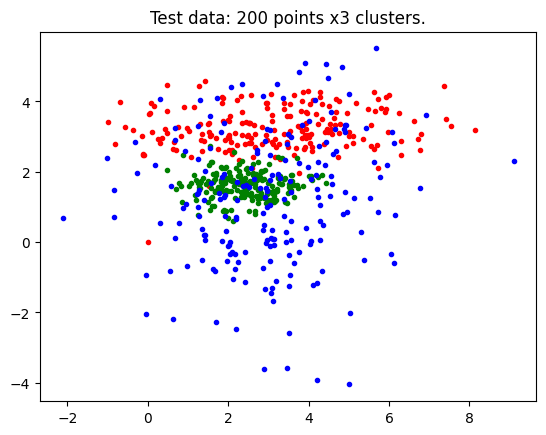

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = array = np.random.uniform(1, 10, size=(3, 2))
# Define three cluster sigmas in x and y, respectively
sigmas = array = np.random.uniform(0.1, 3, size=(3, 2))

# Generate test data
# np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(200) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 200 points x3 clusters.')

# print(xpts)
# print(ypts)